In [363]:
import numpy as np
#matrix manip

import matplotlib.pyplot as plt
#plot results

import winsound
#notify when new solution found

river_val = 1
thicket_val = 0
pre_position = []
current_position = []
field = []

def create_grid(max_height,max_len):
    field = np.zeros((max_height+1,max_len+1))
    return field

def get_field(x,y,field):
    return field[cartesean_to_matrix((x,y))] 

def cartesean_to_matrix(pos):
    new_pos = (pos[1],pos[0])
    return new_pos


def change_field(current_position,field,value):
    field[cartesean_to_matrix(current_position)] = value
    return field

def select_start(field,override = False):
    #find all coordinates on the "edge"
    #in this case, should only really be top [y=0] and bottom [x=0] because of symmetry?
    global current_position
    #create a vector that has all start positions. 
    if override:
        start = override
    else:    
        start_positions = []
        for i in range(0,max_h+1):
            start_positions.append((0,i))
        for j in range(0,max_l+1):
            start_positions.append((j,0))
        start = start_positions[int(np.random.choice(len(start_positions),1))]
    current_position = start
    change_field(start,field,1)
    return start, current_position


def check_surrounding(x,y,field,match):
    #rivers only have a degree of 2 (graph theory)
    #maybe pass previous position when river move to go from 4 to 3 checks?
    possible_moves = []
    
    for i in [[-1,0],[1,0],[0,-1],[0,1]]:
        if 0 <= x + i[0] <= max_l:
            if 0 <= y + i[1] <= max_h:
                if get_field(x+i[0],y+i[1],field) == match:
                    possible_moves.append((x+i[0],y+i[1]))
    return possible_moves



def river_move(current_pos,field):
    global pre_position
    global current_position
    
    
    possible_moves = check_surrounding(current_position[0],current_position[1],field,thicket_val)
    if len(possible_moves) == 0:
        return False
    else:
        pre_position = current_position
        current_position = possible_moves[int(np.random.choice(len(possible_moves),1))]
        change_field(current_position,field,river_val)
    return current_position


def calculate_bonus(field):
    thicket_value = 0
    for i in range(0,len(field[0])):
        for j in range(0,len(field)):
            if get_field(i,j,field) == 0: #if it is a river (1)
                neighbor_river = check_surrounding(i,j,field,river_val)
                if len(neighbor_river) == 0:
                    thicket_value += 2
                else:
                    thicket_value += 4 * (len(neighbor_river)) #surrounding rivers (1)
    return thicket_value


Max_Value: 130 
 Search n: 1


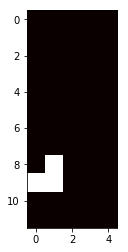

Max_Value: 136 
 Search n: 1


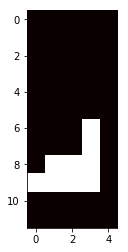

Max_Value: 140 
 Search n: 1


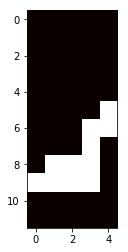

Max_Value: 144 
 Search n: 1


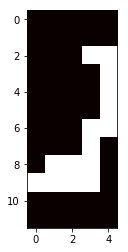

Max_Value: 152 
 Search n: 1


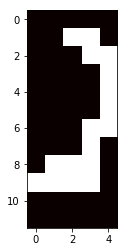

Max_Value: 156 
 Search n: 1


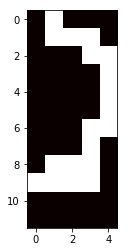

Max_Value: 162 
 Search n: 1


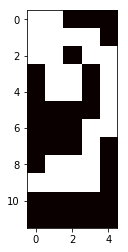

Max_Value: 166 
 Search n: 57


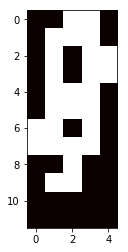

Max_Value: 172 
 Search n: 57


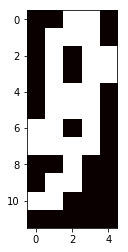

Max_Value: 182 
 Search n: 250


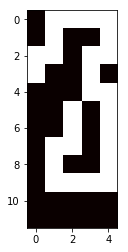

Max_Value: 184 
 Search n: 2923


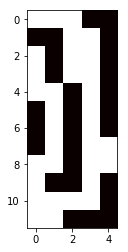

Max_Value: 186 
 Search n: 28648


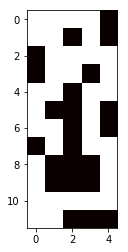

Max_Value: 192 
 Search n: 28648


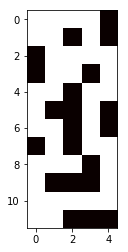

150512


In [383]:
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
max_val = 0
max_field = []
#start_pos = (0,1)

max_h = 11 #0 the lowest
max_l = 4 #0 the lowest

loop = 0

try:
    while True:
        loop += 1
        
        

        field = create_grid(max_h,max_l)
        
        step_len = np.random.randint(15,field.size+1)
        
        select_start(field)
        step = 0
        while river_move(current_position,field) is not False and step<step_len:

            river_move(current_position,field)
            step+=1

            if calculate_bonus(field) > max_val:
                max_val = calculate_bonus(field)
                max_field = field

                print('Max_Value: {0} \n Search n: {1}'.format(max_val,loop))

                plt.imshow(max_field, cmap='hot')
                plt.show()
                if loop>2000:
                    winsound.Beep(frequency, duration)

except KeyboardInterrupt:
    print(loop)
    pass
##print(max_val)

#plt.imshow(max_field, cmap='hot')
#plt.show()